In [5]:
# Import libraries
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Dataset, Subset
import torch.nn.functional as F

# A module to print a model summary (outputs shape, number of parameters, ...)
import torchsummary

# Tensorboard for visualization
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Custom modules and packages
import params.supervised_learning
import utils_supervised
import traversalcost.utils
from dataset import SupervisedNetworkDataset
from model import SupervisedNetwork 
from loss import SupervisedLoss 
from train import train
from validate import validate
from test import test_supervised

## Prepare data

In [6]:
print(params.supervised_learning.DATASET)
print(params.supervised_learning.NB_EPOCHS)
print(params.supervised_learning.BATCH_SIZE)
print(params.supervised_learning.LEARNING_RATE)
print(params.supervised_learning.WEIGHT_DECAY)

help(utils_supervised.compute_traversal_costs)

/home/g_thomas/Documents/PRE/src/traversal_cost/datasets/dataset_small_DS_test
15
1
0.0022
7.41e-07
Help on function compute_traversal_costs in module utils_supervised:

compute_traversal_costs(dataset, cost_function, only_test, to_tensor=False)
    Compute the traversal cost of each sample in a dataset
    
    Args:
        dataset (string): Path to the dataset
        cost_function (function): Function used to compute the cost of a
        sample
        to_tensor (bool, optional): If True, convert the cost to a tensor.
        Defaults to False.
    
    Returns:
        dataframe: A dataframe containing the terrain classes, the linear
        velocities of the robot and the traversal costs



In [7]:
# Create a Dataset for training
train_set = SupervisedNetworkDataset(params.supervised_learning.DATASET / "traversalcosts_train.csv",
                                params.supervised_learning.DATASET / "features")

        
# Create a Dataset for testing
test_set = SupervisedNetworkDataset(params.supervised_learning.DATASET / "traversalcosts_test.csv",
                                params.supervised_learning.DATASET / "features")

In [8]:
# Combine a dataset and a sampler, and provide an iterable over the dataset
# (setting shuffle argument to True calls a RandomSampler, and avoids to
# have to create a Sampler object)

train_loader = DataLoader(
    train_set,
    batch_size= params.supervised_learning.BATCH_SIZE,
    shuffle=True,
    num_workers=12,  # Asynchronous data loading and augmentation
    pin_memory=True,  # Increase the transferring speed of the data to the GPU
)

test_loader = DataLoader(
    test_set,
    batch_size= params.supervised_learning.BATCH_SIZE,
    shuffle=True,
    num_workers=12,  # Asynchronous data loading and augmentation
    pin_memory=True,  # Increase the transferring speed of the data to the GPU
)

## GPU ?

In [9]:
# Use a GPU if available
# device = "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}\n")

Device: cuda



In [10]:
# Create a model
model = SupervisedNetwork().to(device=device)

criterion = SupervisedLoss().to(device=device)

In [11]:
#Creating list for plot afterwards

List_train_loss_value = []
List_test_loss_value = []

optimizer = optim.SGD(model.parameters(),
                      lr=params.supervised_learning.LEARNING_RATE,
                      momentum=params.supervised_learning.MOMENTUM,
                      weight_decay=params.supervised_learning.WEIGHT_DECAY)

# Loop over the epochs

for epoch in range(params.supervised_learning.NB_EPOCHS):
    
    # Training
    train_loss = train(model,
                       device,
                       train_loader,
                       optimizer,
                       criterion,
                       epoch)
    
    # Validation
    val_loss = validate(model,
                        device,
                        test_loader,
                        criterion,
                        epoch) 
    
    print("Train loss: ", train_loss)
    print("Validation loss: ", val_loss)
    
    # Store the computed losses
    List_train_loss_value.append(train_loss)
    List_test_loss_value.append(val_loss)
    

  0%|          | 0/720 [00:00<?, ?batch/s]

/home/g_thomas/Documents/PRE/src/traversal_cost/supervised_network/loss.py:21: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(estimated_cost, real_cost)


  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  4.139248181632827
Validation loss:  3.0832421861588957


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.119497243382188
Validation loss:  3.098239526269026


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.121268492756298
Validation loss:  3.1549232032234764


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.1432766133965035
Validation loss:  3.081763011813382


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.095607177328888
Validation loss:  3.4314544738280044


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.158200255518779
Validation loss:  3.118229517802441


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.120617200581943
Validation loss:  3.0816359622830833


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.1045898817363695
Validation loss:  3.2606978367409587


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.056551114269232
Validation loss:  3.2774491141155524


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.1327863211683957
Validation loss:  3.4563880789404116


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.16916410763355
Validation loss:  3.117130796122365


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.16943782017005
Validation loss:  3.14811772333087


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.093815748477775
Validation loss:  3.310227474074054


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.1490552706104458
Validation loss:  3.1195008957525716


  0%|          | 0/720 [00:00<?, ?batch/s]

  0%|          | 0/240 [00:00<?, ?batch/s]

Train loss:  3.1162952029807105
Validation loss:  3.107862249046836


## Visualization 

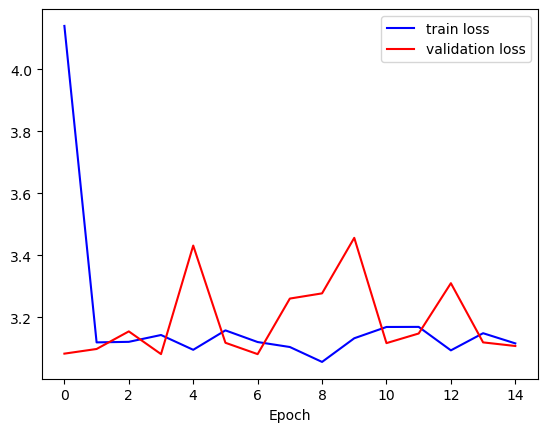

In [12]:
plt.plot(range(params.supervised_learning.NB_EPOCHS), List_train_loss_value, "b", label="train loss")

plt.plot(range(params.supervised_learning.NB_EPOCHS), List_test_loss_value, "r", label="validation loss")

plt.xlabel("Epoch")
plt.legend()

## Testing

In [13]:
# Test the model
test_loss = test_supervised(model,
                 device,
                 test_loader,
                 criterion)

print("Test loss: ", test_loss)

Test loss:  3.107862249046836


In [20]:
def compute_traversal_costs(dataset,
                            cost_function,
                            only_test,
                            to_tensor=False
                            ):
    """Compute the traversal cost of each sample in a dataset

    Args:
        dataset (string): Path to the dataset
        cost_function (function): Function used to compute the cost of a
        sample
        to_tensor (bool, optional): If True, convert the cost to a tensor.
        Defaults to False.

    Returns:
        dataframe: A dataframe containing the terrain classes, the linear
        velocities of the robot and the traversal costs
    """    
    # Read the csv file containing the labels
    
    if only_test == False :
        
        print(f"not only test ok !")

        labels_df = pd.read_csv(dataset / "labels.csv",
                            converters={"id": str})
    
        # Add an empty column to the dataframe
        labels_df["cost"] = ""
    
        for i in range(len(labels_df.index)):
            # Get the id of the current sample
            id = labels_df["id"][i]
            
            # Load the features of the current sample
            features = np.load(dataset / "features" / (str(id) + ".npy"))
            
            # Convert the features to a tensor if required
            if to_tensor:
                features = torch.from_numpy(features).float()
            
            # Compute the cost of the current sample
            cost = cost_function(features)
            
            # Convert the cost to a float if required
            if to_tensor:
                cost = cost.item()
            
            # Store the cost in the dataframe
            labels_df.at[i, "cost"] = cost
        
    if only_test == True :
        
        print(f"only test ok !")
        
        labels_df = pd.read_csv(dataset / "labels.csv",
                            converters={"id": str})
        
        test_data_labels_df =  pd.read_csv(dataset / "traversalcosts_test.csv",
                            converters={"id": str})
        
        
        # Add an empty column to the dataframe
        labels_df["cost"] = ""
        
        print(test_data_labels_df)
        
        for i in range(len(test_data_labels_df.index)):
            # Get the id of the current sample
            id = test_data_labels_df["id"][i]
            
            # Load the features of the current sample
            features = np.load(dataset / "features" / (str(id) + ".npy"))
            #print(f"feature is {features}")
            
            # Convert the features to a tensor if required
            if to_tensor:
                features = torch.from_numpy(features).float()
            
            # Compute the cost of the current sample
            cost = cost_function(features)
            
            # Convert the cost to a float if required
            if to_tensor:
                cost = cost.item()
            
            # Store the cost in the dataframe
            labels_df.at[i, "predicted_cost"] = cost
        
        labels_df = labels_df.dropna(axis=0)

    # Extract the terrain classes, the linear velocities and the costs
    costs_df = labels_df[["terrain_class",
                          "linear_velocity",
                          "predicted_cost"]]
    
    return costs_df


In [21]:
costs_df = compute_traversal_costs(dataset = params.supervised_learning.DATASET,
                            cost_function=model.to(device="cpu"),
                            only_test = True,
                            to_tensor=True
)

costs_df

only test ok !
      id  cost
0    005   0.3
1    898   1.6
2    318   3.0
3    569   1.4
4    633   7.0
..   ...   ...
235  664   1.8
236  136   2.8
237  306   3.0
238  922   2.4
239  840   0.6

[240 rows x 2 columns]


,terrain_class,linear_velocity,predicted_cost
0,grass_easy,0.2,2.528256
1,grass_easy,0.2,2.528256
2,grass_easy,0.2,2.528256
3,grass_easy,0.2,2.528256
4,grass_easy,0.2,2.528256
...,...,...,...
235,road_medium,1.0,2.528256
236,road_medium,1.0,2.528256
237,road_medium,1.0,2.528256
238,road_medium,1.0,2.528256


In [30]:
def plot_theorical_cost(dictionnary, epoch):
    t = np.linspace(0, epoch, 500)
    
    for key in dictionnary.keys():
        plt.plot(t, dictionnary[key](t), '.', label = f"{key}")
    plt.legend()

In [41]:
costs_df

,terrain_class,linear_velocity,predicted_cost
0,grass_easy,0.2,2.528256
1,grass_easy,0.2,2.528256
2,grass_easy,0.2,2.528256
3,grass_easy,0.2,2.528256
4,grass_easy,0.2,2.528256
...,...,...,...
235,road_medium,1.0,2.528256
236,road_medium,1.0,2.528256
237,road_medium,1.0,2.528256
238,road_medium,1.0,2.528256


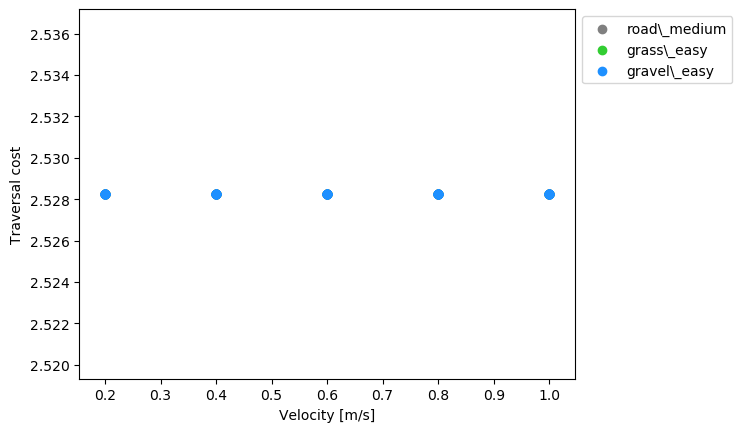

In [37]:
cost_graph = traversalcost.utils.display_traversal_costs(costs_df.rename(columns={"predicted_cost": "cost"}))#, False, params.supervised_learning.terrain_cost,
                                                        #  params.supervised_learning.NB_EPOCHS)
# plot_theorical_cost(params.supervised_learning.terrain_cost, params.supervised_learning.NB_EPOCHS)
#cost_graph = traversalcost.utils.display_traversal_costs_whiskers(costs_df)


## Save model parameters

In [ ]:
# Save the model parameters
#torch.save(model.state_dict(), "siamese.params")